In [8]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import math
from scipy.stats import norm
import matplotlib.mlab as mlab
from matplotlib import cm
%config InlineBackend.figure_format='retina'

## Exercise 09: genetic algorithms for TSP

In the following exercise the Travelling Salesman Problem (TSP) is approached though tthe use of genetic algorithms. Genetic algorithms loosely speeking try to mimic the "natural evolution" of a population typically in order to solve an optimization problem. 

<img src="TSP.png" alt="drawing" width="500"/>

### TSP

The travelling salesman problem posees a simple question: given a set of cities on a plane what is the fastest route that one can travel demanding that the cities are visited only once and that the traveller returns to the starting point?
In order to transalte this issue in a genetic algorithmic language the procedure is:
- the coordinates of the $N $cities are stored in an ordered vector
- a path is given by a vector of integers ranging from $0$ to $N-1$ representing the order in which the cities are visited. The path is assumed to go back to the original city after the last is visited
- a population of paths is built.

After the initialization of the environment the genetic algorithm can start 

### Genetic algorithm

As briefly stated above the GA tries to mimic the evolution of a population. What is meant by this sentence is that the strating population "evolves" trhough random variations (mutations) of the characteristics of some individuals and through successive generations given by some kind of "mix" between parents. Clearly the specific character of these operations strongly depends on the problem and the way it is formulated.
In the case of the present exercise the mutations operations and the "mixing" of individuals were implemented as:
- crossover between parents: two parents are chosen from the ordered population (individuals from best fitness to worst fitness) with the algorithm $int(N_{individuals} \times r^p)$ where $r \in [0,1)$ is a uniformly distributed RV and $p>1$ is a suitable number (here chosen as $p = 4.5$). Then the "children" are created taking a random section of the two parents and replacing them in each parent with the same cities but following the order of the other parent. At each iteration of the algorithm the crossover happens with $90\%$ probability.
- after the children are generated they can incur with probability $10\%$ in the mutations below described with defined relative frequecies
- individuals from the population can incur in mutations with probability $20\%$ at each iteration of the GA for the circle case; for the cities randomly placed in a square this probability was chosen as $2\%$ as performances were better 

The possible mutations on children are:
1. random swap in the order of two cities
2. switch of two contiguous cities
3. switch of two sections of the same individual (a chuck of $n$ elemnts starting from position $n_{cut}$ is exchanged with a chunk of the same length starting from another position $n_{cut_1}$)
4. mirroring of a section of an individual
5. switch of two contiguous sections of the same individual (peculiar case of 3.)
6. translation of 1 position to the right of a section of an individual
7. translation of 1 position to the left of a section of an individual

Mutations 5 and 2 which are peculiar cases respectively of 3 and 1 were added only to make these specific mutations more frequent. The relative probabilities with which these are called both during generation of children and during the random "mix" of the population are:
1. random swap: $\frac{1}{7}$
2. switch of neighbors: $\frac{0.8}{7}$
3. sections switch $\frac{0.5}{7}$
4. mirror: $\frac{1.7}{7}$
5. cont section switch: $\frac{1}{7}$
6. right translation: $\frac{1}{7}$
7. left translation: $\frac{1}{7}$

The genetic algorithm is then finally performed. Counting the "generation" once every $N = N_{chromosomes}$ iterations of the procedure, the circle needed $100$ generations, while the square needed $500$.

In [9]:
fit_circle = np.loadtxt("Mean_best_half_circle.txt")
x = np.arange(0,np.size(fit_circle),1)

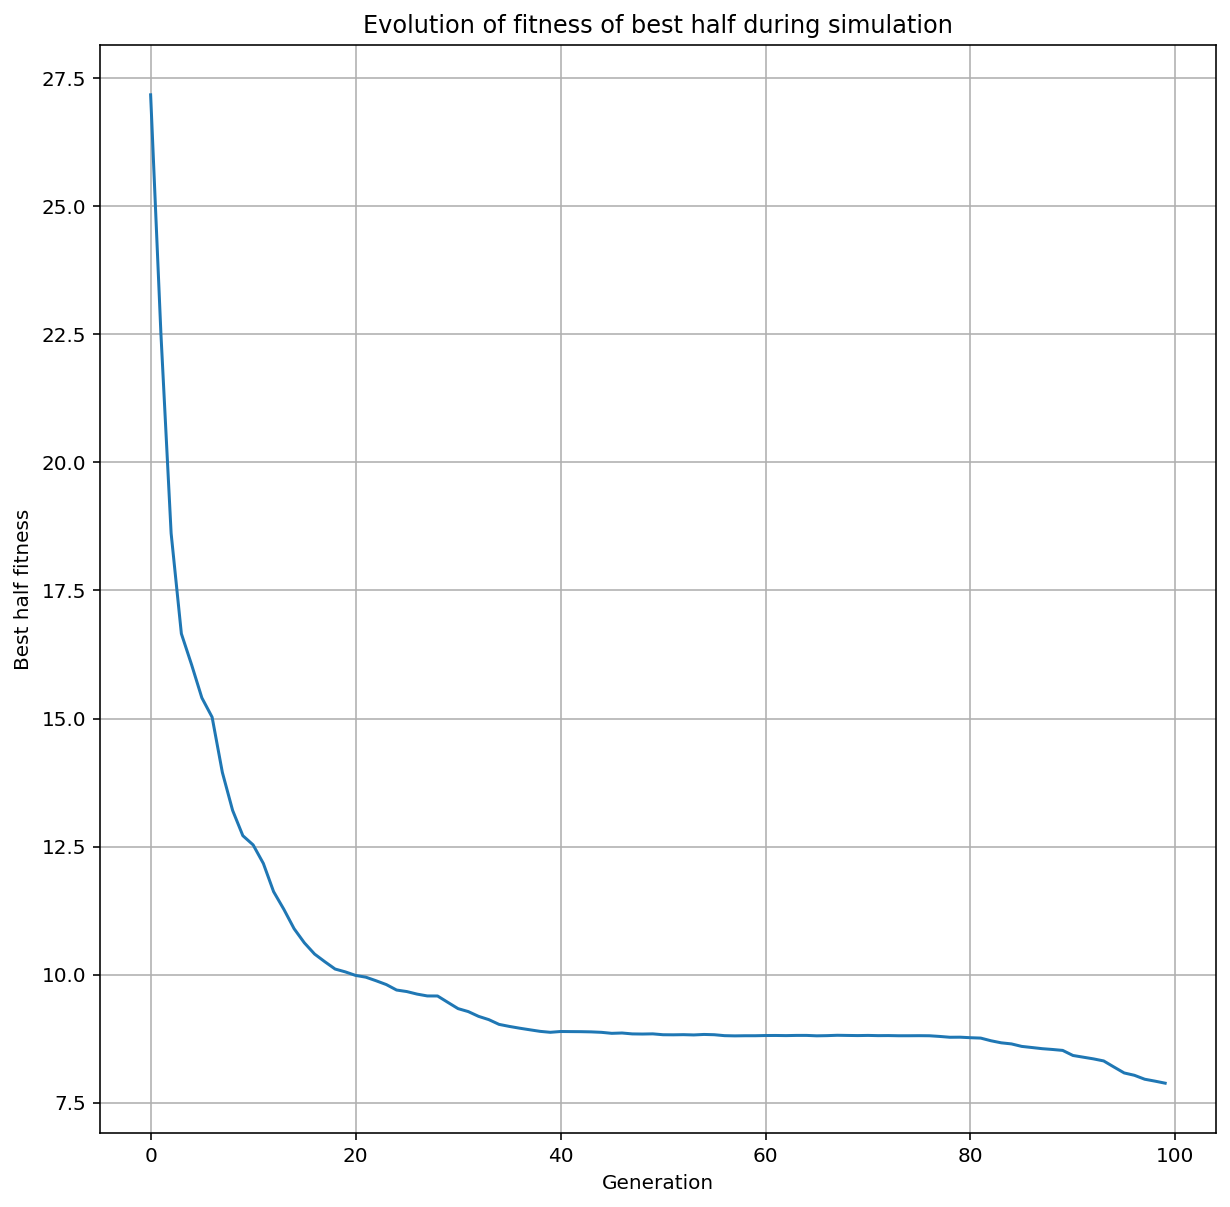

In [10]:
fig, ax = plt.subplots(figsize = (10,10))
ax.plot(x, fit_circle)
ax.set_xlabel("Generation")
ax.set_ylabel("Best half fitness")
ax.set_title("Evolution of fitness of best half during simulation")
ax.grid(True)
plt.show()

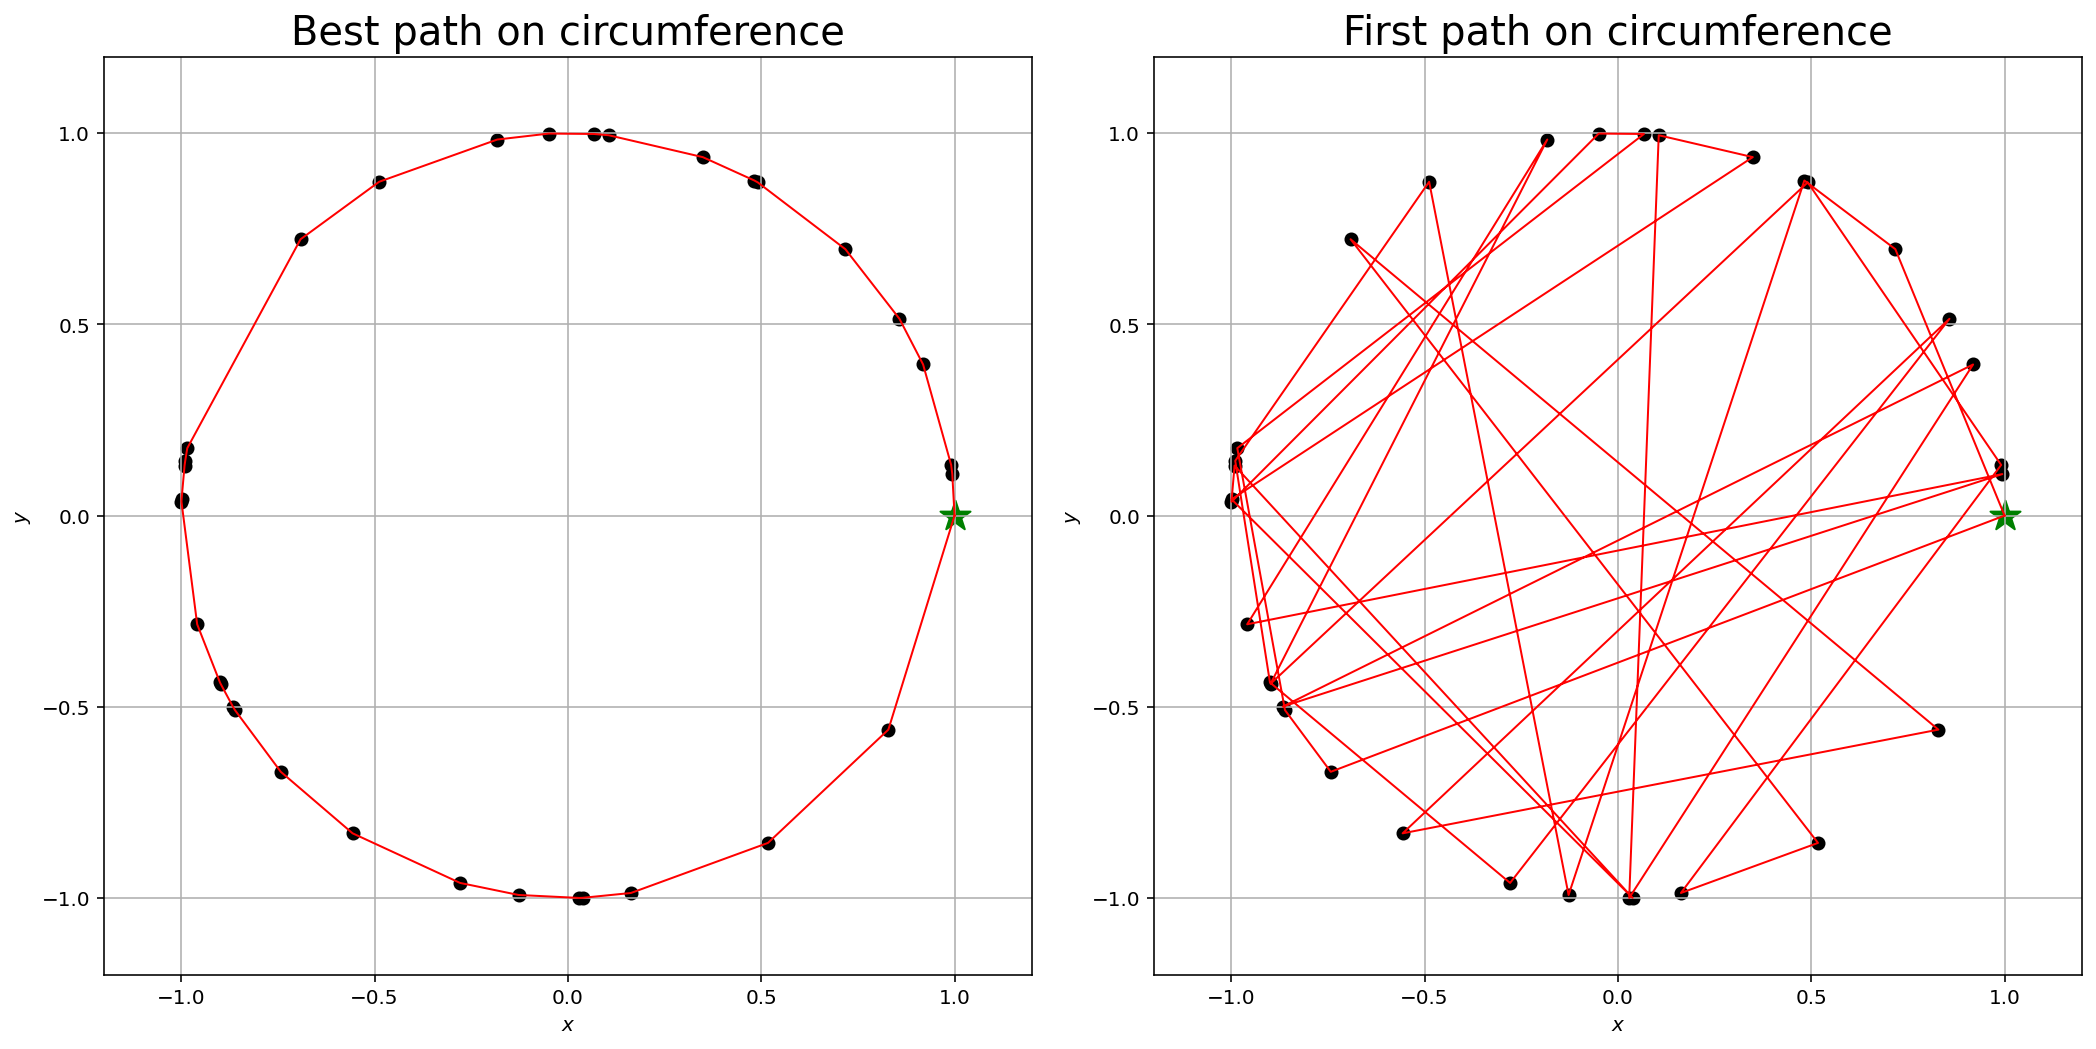

In [11]:
pop = np.loadtxt('best_circle.txt')
cities = np.loadtxt('circle_cities.txt')
pop_first = np.loadtxt('first_try_circle.txt')

fig, ax = plt.subplots(1,2, figsize=(15,7.5))
fig.tight_layout(pad = 3.0)
x_0 = np.zeros((2,35))
y_0 = np.zeros((2,35))
i=0
for city in pop:
    x_0[0][i] = np.cos(cities[int(city)])
    x_0[1][i] = np.sin(cities[int(city)])
    i+=1
i=0
for city in pop_first:
    y_0[0][i] = np.cos(cities[int(city)])
    y_0[1][i] = np.sin(cities[int(city)])
    i+=1
x_0[0][34] = x_0[0][0]
x_0[0][34] = x_0[0][0]
ax[0].scatter(x_0[0],x_0[1], marker='o', color = 'black')
ax[0].scatter(x_0[0][0],x_0[1][0], marker='*', s=250, color='green')
ax[0].plot(x_0[0],x_0[1], color='red', linewidth=1)
ax[0].set_xlim(-1.2,1.2)
ax[0].set_ylim(-1.2,1.2)
ax[0].set_title('Best path on circumference', size=20)
ax[0].set_xlabel("$x$")
ax[0].set_ylabel("$y$")
ax[0].grid()

y_0[0][34] = y_0[0][0]
y_0[0][34] = y_0[0][0]
ax[1].scatter(y_0[0],y_0[1], marker='o', color = 'black')
ax[1].scatter(y_0[0][0],y_0[1][0], marker='*', s=250, color='green')
ax[1].plot(y_0[0],y_0[1], color='red', linewidth=1)
ax[1].set_xlim(-1.2,1.2)
ax[1].set_ylim(-1.2,1.2)
ax[1].set_title('First path on circumference', size=20)
ax[1].set_xlabel("$x$")
ax[1].set_ylabel("$y$")
ax[1].grid()


In [12]:
fit_square = np.loadtxt("Mean_best_half_square.txt")
x = np.arange(0,np.size(fit_square),1)

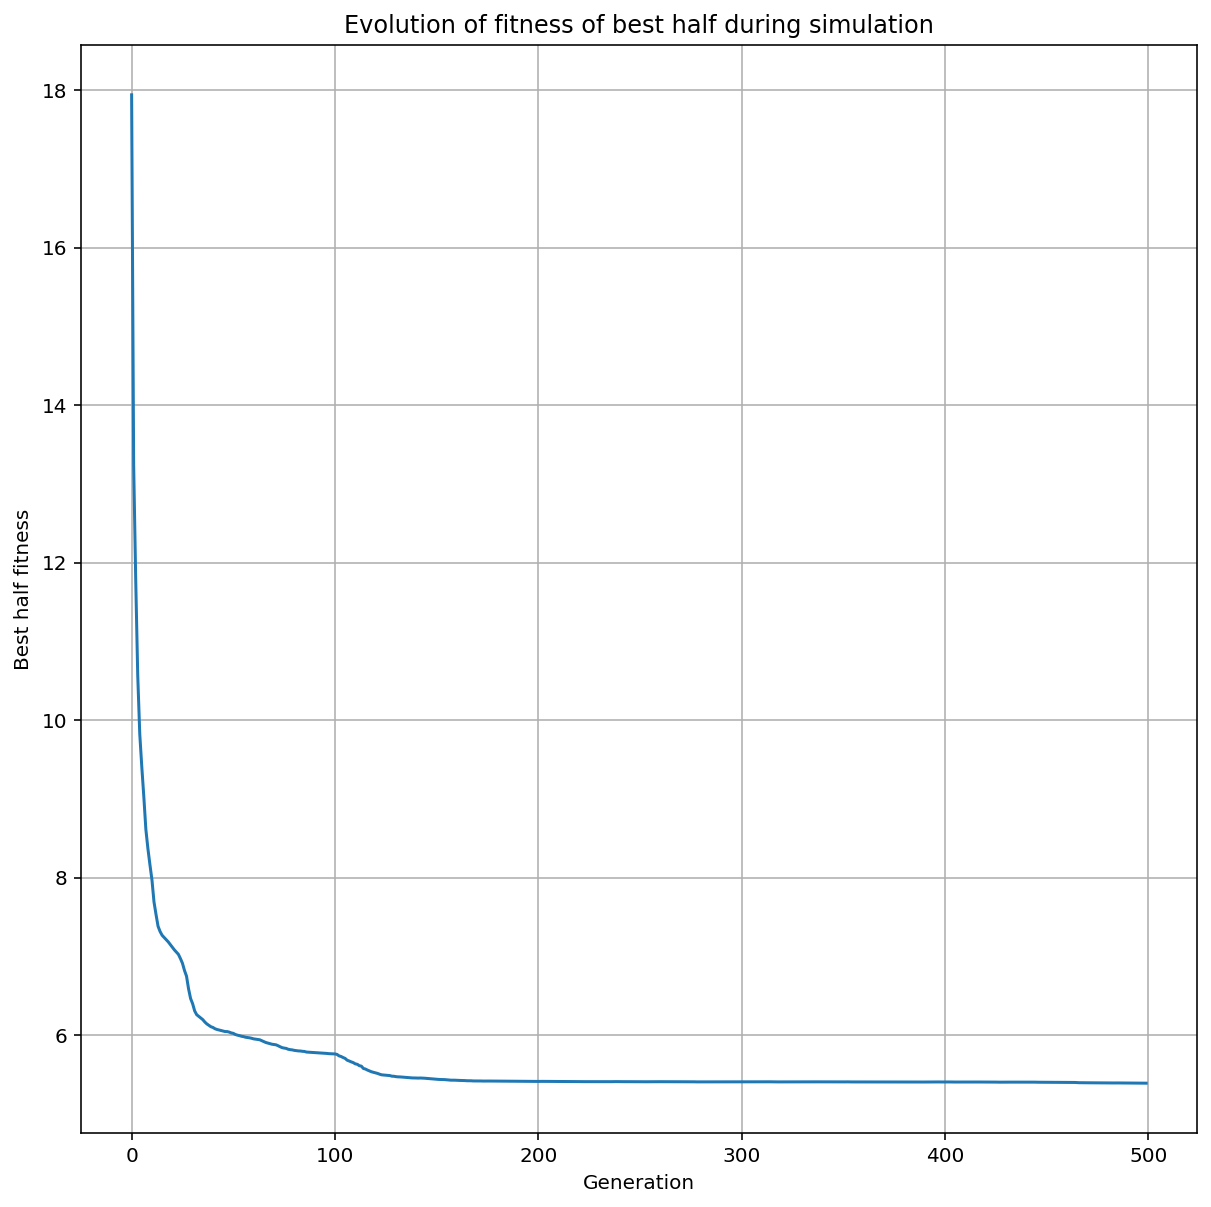

In [13]:
fig, ax = plt.subplots(figsize = (10,10))
ax.plot(x, fit_square)
ax.set_xlabel("Generation")
ax.set_ylabel("Best half fitness")
ax.set_title("Evolution of fitness of best half during simulation")
ax.grid(True)
plt.show()

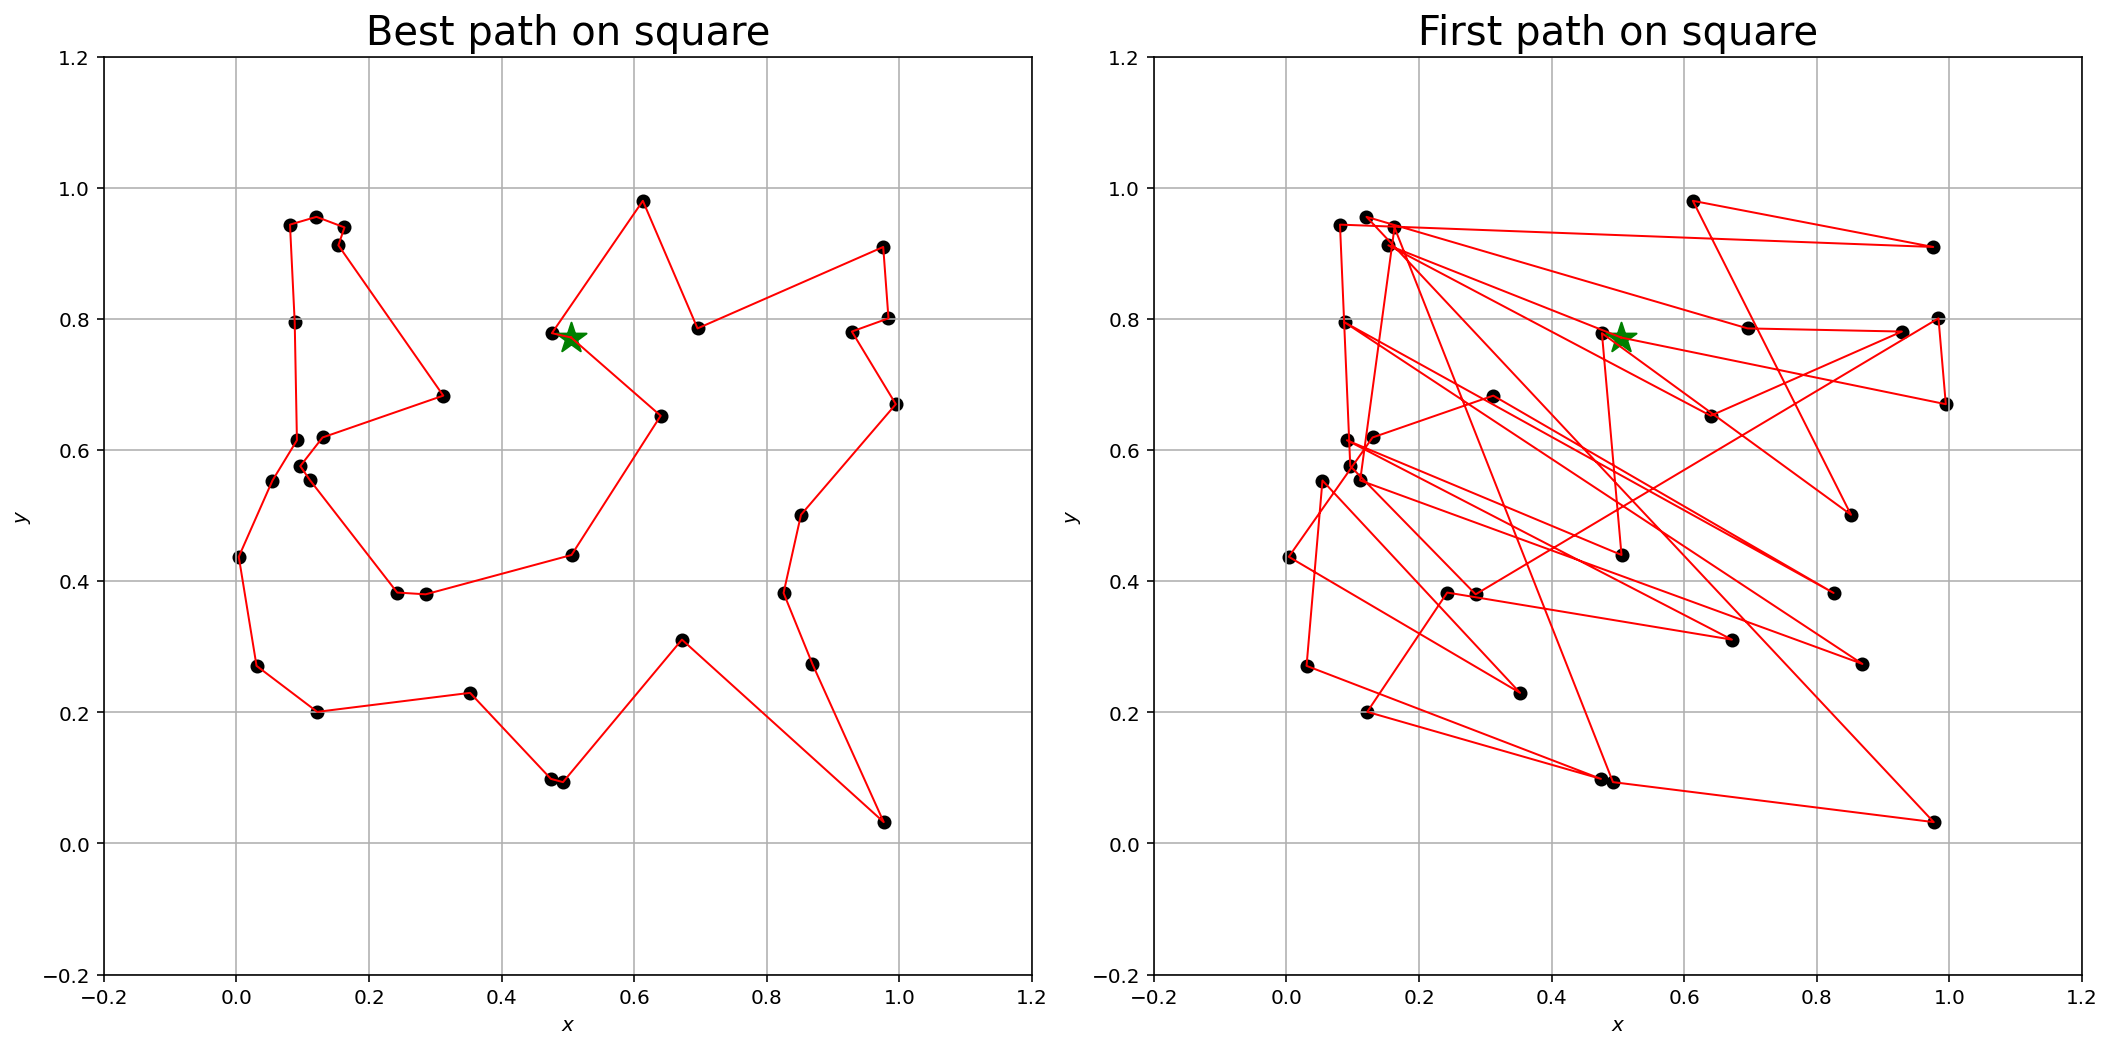

In [14]:
pop = np.loadtxt('best_square.txt')
cities_x, cities_y = np.loadtxt('square_cities.txt', usecols = (0,1), unpack = True)
pop_first = np.loadtxt('first_try_square.txt')

fig, ax = plt.subplots(1,2, figsize=(15,7.5))
fig.tight_layout(pad = 3.0)
x_0 = np.zeros((2,35))
y_0 = np.zeros((2,35))
i=0
for city in pop:
    x_0[0][i] = cities_x[int(city)]
    x_0[1][i] = cities_y[int(city)]
    i+=1
i=0
for city in pop_first:
    y_0[0][i] = cities_x[int(city)]
    y_0[1][i] = cities_y[int(city)]
    i+=1
x_0[0][34] = x_0[0][0]
x_0[1][34] = x_0[1][0]
ax[0].scatter(x_0[0],x_0[1], marker='o', color = 'black')
ax[0].scatter(x_0[0][0],x_0[1][0], marker='*', s=250, color='green')
ax[0].plot(x_0[0],x_0[1], color='red', linewidth=1)
ax[0].set_xlim(-0.2,1.2)
ax[0].set_ylim(-0.2,1.2)
ax[0].set_title('Best path on square', size=20)
ax[0].set_xlabel("$x$")
ax[0].set_ylabel("$y$")
ax[0].grid()

y_0[0][34] = y_0[0][0]
y_0[1][34] = y_0[1][0]
ax[1].scatter(y_0[0],y_0[1], marker='o', color = 'black')
ax[1].scatter(y_0[0][0],y_0[1][0], marker='*', s=250, color='green')
ax[1].plot(y_0[0],y_0[1], color='red', linewidth=1)
ax[1].set_xlim(-0.2,1.2)
ax[1].set_ylim(-0.2,1.2)
ax[1].set_title('First path on square', size=20)
ax[1].set_xlabel("$x$")
ax[1].set_ylabel("$y$")
ax[1].grid()